In [116]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

In [70]:
# import data
df = pd.read_csv("C:/Users/Evan/Documents/GitHub/SMU-MSDS/Coursework/ML1/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
df.head(5)
# only 3 numerical values, SeniorCitizen is discrete and could be "yes or no" like the rest of the values.
# or just change all the "yes/no to 1/0"
# 'multiplelines' attribute means 0, 1, 2+
# lots of values with yes, no, no internet service

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [130]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [31]:
# why is the max tenure 72 and why are most of them 1?
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [57]:
pd.crosstab(df['SeniorCitizen'],df['InternetService'])

InternetService,DSL,Fiber optic,No
SeniorCitizen,,,
0,2162,2265,1474
1,259,831,52


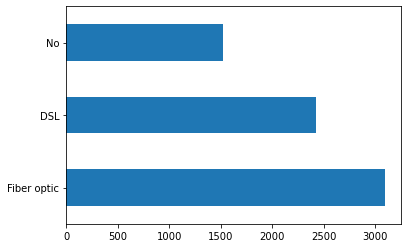

In [60]:
df.InternetService.value_counts().plot(kind='barh')

In [94]:
# perhaps we should group monthly charges into clusters?
df.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [97]:
# replace all the yes/no with 0/0
df = df.replace({"No":0, "Yes":1})

C:\Users\Evan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Evan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Evan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Evan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


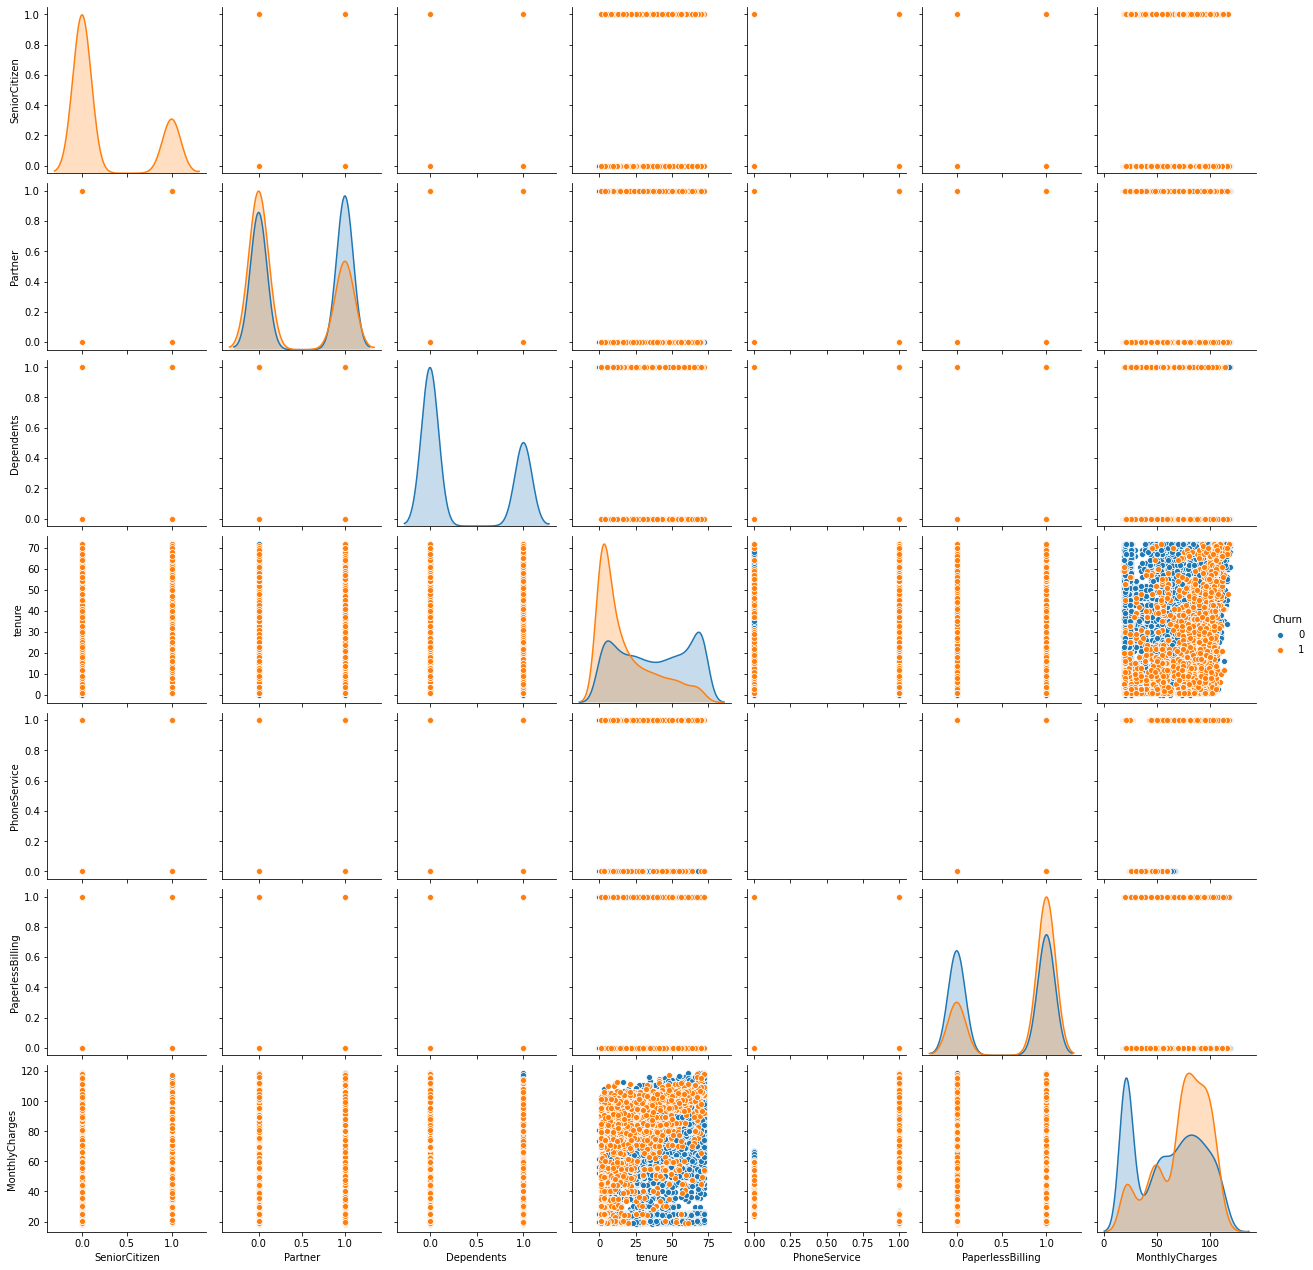

In [99]:
p = sns.pairplot(df, hue='Churn')

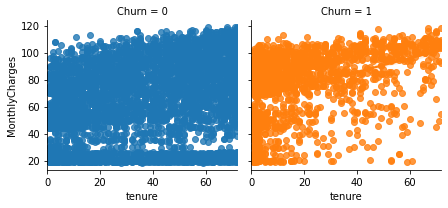

In [108]:
p = sns.FacetGrid(df, col='Churn', hue='Churn', col_wrap=4)
p.map(sns.regplot, 'tenure', 'MonthlyCharges');

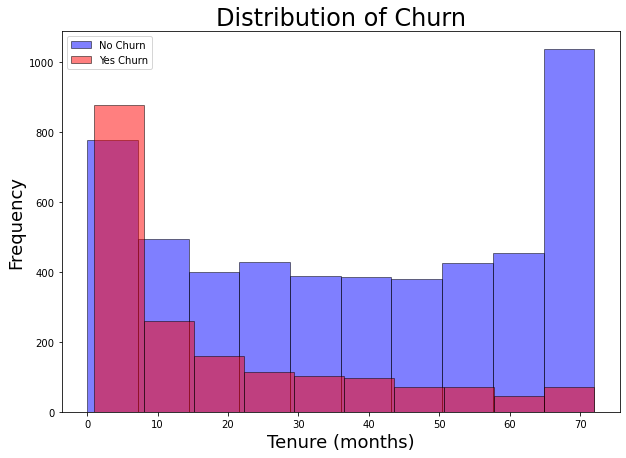

In [122]:
# looks like churn happens in the first year for the most part
df[df['Churn'] == 0].tenure.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10,7))
df[df['Churn'] == 1].tenure.plot(kind='hist', color='red', edgecolor='black', alpha=0.5, figsize=(10,7))
plt.legend(labels=['No Churn', 'Yes Churn'])
plt.title('Distribution of Churn', size=24)
plt.xlabel('Tenure (months)', size=18)
plt.ylabel('Frequency', size=18);

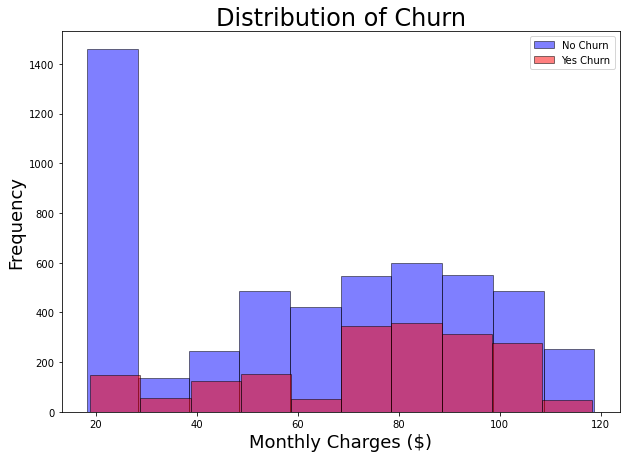

In [124]:
# possibly shows more churn with a higher monthly charge
df[df['Churn'] == 0].MonthlyCharges.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10,7))
df[df['Churn'] == 1].MonthlyCharges.plot(kind='hist', color='red', edgecolor='black', alpha=0.5, figsize=(10,7))
plt.legend(labels=['No Churn', 'Yes Churn'])
plt.title('Distribution of Churn', size=24)
plt.xlabel('Monthly Charges ($)', size=18)
plt.ylabel('Frequency', size=18);

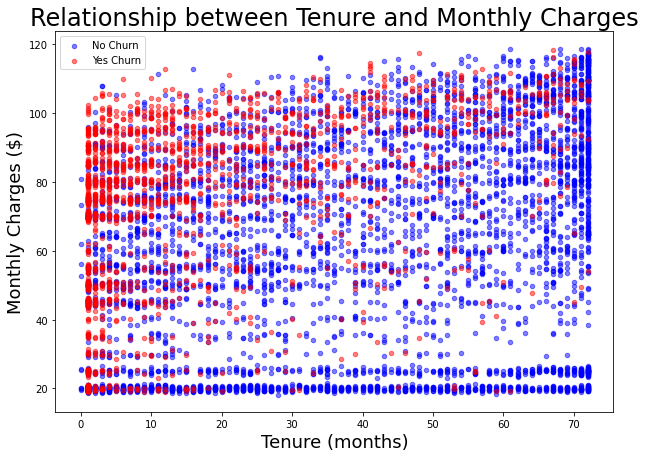

In [128]:
# kind of tells the same story as before, there's churn in the first year and when the price is high
ax1 = df[df['Churn'] == 0].plot(kind='scatter', x='tenure', y='MonthlyCharges', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Churn'] == 1].plot(kind='scatter', x='tenure', y='MonthlyCharges', color='red', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['No Churn', 'Yes Churn'])
plt.title('Relationship between Tenure and Monthly Charges', size=24)
plt.xlabel('Tenure (months)', size=18)
plt.ylabel('Monthly Charges ($)', size=18);

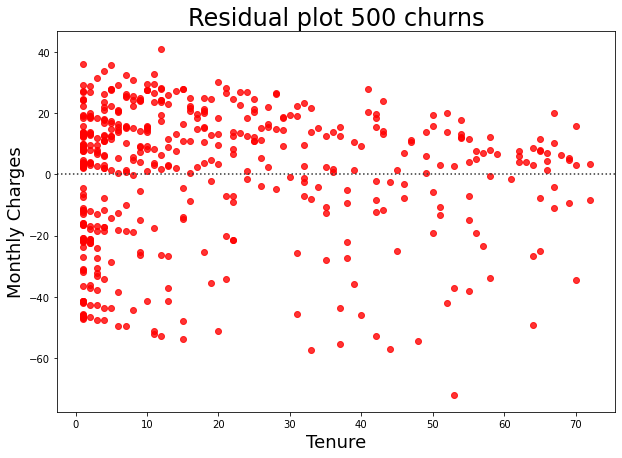

In [136]:
# residual plot of tenure against monthly charges not looking so good
df_churn = df[df['Churn'] == 1].sample(500)

fig = plt.figure(figsize = (10, 7))
sns.residplot(df_churn.tenure, df_churn.MonthlyCharges, color='red')

plt.title('Residual plot 500 churns', size=24)
plt.xlabel('Tenure', size=18)
plt.ylabel('Monthly Charges', size=18);

In [138]:
# MLR of monthly charges, churn against tenure
mlr = LinearRegression()
mlr.fit(df[['MonthlyCharges','Churn']], df['tenure'])
print(mlr.intercept_)
print(mlr.coef_)

21.15452768965296
[  0.26794098 -23.12127827]
